# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     859.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.23e-40
Time:                        14:44:56   Log-Likelihood:               -0.32066
No. Observations:                  50   AIC:                             8.641
Df Residuals:                      46   BIC:                             16.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0047      0.087     57.832      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50696611  5.01860301  5.48555202  5.87601079  6.16965428  6.36097408
  6.46018347  6.49153936  6.48935696  6.49237192  6.53737614  6.65317296
  6.85584487  7.14611122  7.50920999  7.91732317  8.33414718  8.72085747
  9.04248722  9.27367235  9.40281874  9.43400713  9.38632263  9.29071912
  9.18493362  9.10728617  9.090384    9.15576422  9.31035535  9.54533897
  9.83759859 10.15351759 10.45450235 10.70332309 10.87023058 10.93784389
 10.904006   10.78213822 10.59903509 10.39046209 10.19527952 10.04905785
  9.97823356  9.99576573 10.09900689 10.27013801 10.4790961  10.68851345
 10.8598571  10.95975963]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.95265234 10.79317328 10.50420664 10.13790256  9.762909    9.44756429
  9.24316554  9.17140932  9.21907956  9.34128335]


## Plot comparison

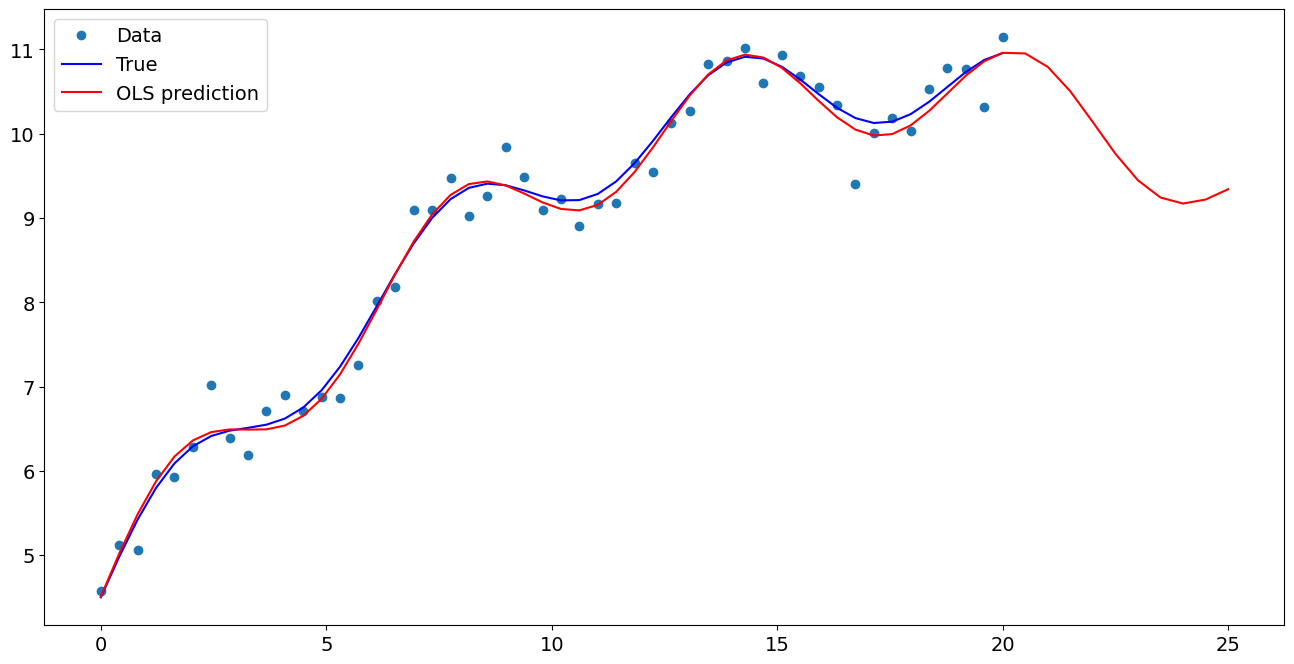

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.004670
x1                  0.495084
np.sin(x1)          0.583539
I((x1 - 5) ** 2)   -0.019908
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.952652
1    10.793173
2    10.504207
3    10.137903
4     9.762909
5     9.447564
6     9.243166
7     9.171409
8     9.219080
9     9.341283
dtype: float64